In [233]:
import os
os.environ["OMP_NUM_THREADS"] = "4"

In [234]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

In [235]:
funnel= pd.read_excel(r'C:\Users\vatsa\OneDrive\Desktop\Projects\FittLyf\AssignmentData.xlsx' , sheet_name='WorkerFunnel')

In [236]:
funnel.head()

,Date,Quarter,Department,Targeted Productivity,Overtime,No. of Workers,Actual Productivity
0,2015-01-01 00:00:00,Q1,Sewing,0.8,7080,59,0.940725
1,2015-01-01 00:00:00,Q1,Finishing,0.75,960,8,0.8865
2,2015-01-01 00:00:00,Q1,Sewing,0.8,3660,30.5,0.80057
3,2015-01-01 00:00:00,Q1,Sewing,0.8,3660,30.5,0.80057
4,2015-01-01 00:00:00,Q1,Sewing,0.8,1920,56,NaN


In [237]:
funnel.tail()

,Date,Quarter,Department,Targeted Productivity,Overtime,No. of Workers,Actual Productivity
1192,2015-11-03 00:00:00,Q2,Finishing,0.75,960,8,0.628333
1193,2015-11-03 00:00:00,Q2,Finishing,0.7,960,8,NaN
1194,2015-11-03 00:00:00,Q2,Finishing,0.65,960,8,0.625625
1195,2015-11-03 00:00:00,Q2,Finishing,0.75,1800,15,0.505889
1196,2015-11-03 00:00:00,Q2,Finishing,0.7,720,6,0.394722


In [238]:
funnel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Date                   1197 non-null   object
 1   Quarter                1197 non-null   object
 2   Department             1197 non-null   object
 3   Targeted Productivity  1197 non-null   object
 4   Overtime               1197 non-null   object
 5   No. of Workers         1197 non-null   object
 6   Actual Productivity    1168 non-null   object
dtypes: object(7)
memory usage: 65.6+ KB


In [239]:
funnel.isna().sum()

Date                      0
Quarter                   0
Department                0
Targeted Productivity     0
Overtime                  0
No. of Workers            0
Actual Productivity      29
dtype: int64

In [240]:
funnel.dropna(axis=0,how='any',inplace=True)

In [241]:
funnel.dtypes

Date                     object
Quarter                  object
Department               object
Targeted Productivity    object
Overtime                 object
No. of Workers           object
Actual Productivity      object
dtype: object

## Converting column "Date" into Datetime

In [243]:
funnel['Date'] = pd.to_datetime(funnel['Date'])

## Convert other relevant columns to numeric

In [245]:

funnel['Targeted Productivity'] = pd.to_numeric(funnel['Targeted Productivity'], errors='coerce')
funnel['Overtime'] = pd.to_numeric(funnel['Overtime'], errors='coerce')
funnel['No. of Workers'] = pd.to_numeric(funnel['No. of Workers'], errors='coerce')
funnel['Actual Productivity'] = pd.to_numeric(funnel['Actual Productivity'], errors='coerce')


In [246]:
funnel.dtypes

Date                     datetime64[ns]
Quarter                          object
Department                       object
Targeted Productivity           float64
Overtime                        float64
No. of Workers                  float64
Actual Productivity             float64
dtype: object

In [247]:
duplicates = funnel[funnel.duplicated(subset=['Overtime', 'No. of Workers', 'Actual Productivity'], keep=False)]
print(duplicates)

           Date Quarter Department  Targeted Productivity  Overtime  \
2    2015-01-01      Q1     Sewing                   0.80    3660.0   
3    2015-01-01      Q1     Sewing                   0.80    3660.0   
5    2015-01-01      Q1     Sewing                   0.80    6720.0   
6    2015-01-01      Q1  Finishing                   0.75     960.0   
14   2015-01-01      Q1  Finishing                   0.75     960.0   
...         ...     ...        ...                    ...       ...   
1183 2015-11-03      Q2     Sewing                   0.75    6000.0   
1186 2015-11-03      Q2     Sewing                   0.75    7080.0   
1189 2015-11-03      Q2     Sewing                   0.70    6840.0   
1190 2015-11-03      Q2     Sewing                   0.70    4560.0   
1192 2015-11-03      Q2  Finishing                   0.75     960.0   

      No. of Workers  Actual Productivity  
2               30.5             0.800570  
3               30.5             0.800570  
5              

In [248]:
# Remove duplicate rows based on specific columns and droping null values
funnel = funnel.drop_duplicates(subset=['Overtime', 'No. of Workers', 'Actual Productivity'])
funnel.dropna(axis=0,how='any',inplace=True)

In [249]:
funnel.set_index('Date')


,Quarter,Department,Targeted Productivity,Overtime,No. of Workers,Actual Productivity
Date,,,,,,
2015-01-01,Q1,Sewing,0.80,7080.0,59.0,0.940725
2015-01-01,Q1,Finishing,0.75,960.0,8.0,0.886500
2015-01-01,Q1,Sewing,0.80,3660.0,30.5,0.800570
2015-01-01,Q1,Sewing,0.80,6720.0,56.0,0.800125
2015-01-01,Q1,Finishing,0.75,960.0,8.0,0.755167
...,...,...,...,...,...,...
2015-11-03,Q2,Sewing,0.70,6960.0,58.0,0.700557
2015-11-03,Q2,Sewing,0.65,6840.0,57.0,0.650596
2015-11-03,Q2,Finishing,0.65,960.0,8.0,0.625625


***
# Principal Component Analysis

In [251]:
#selecting the features for PCA
features = ['Targeted Productivity','Overtime','No. of Workers','Actual Productivity']
X = funnel[features]

In [252]:
# standardize the data 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [253]:
# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

In [254]:
# Explained variance ratio to determine number of components explaining 90% of variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

In [255]:
# Find number of components to explain 90% variance
n_components_90 = next(i for i, total in enumerate(cumulative_variance) if total >= 0.90) + 1
print(f"Number of components explaining at least 90% of the variance: {n_components_90}")


Number of components explaining at least 90% of the variance: 3


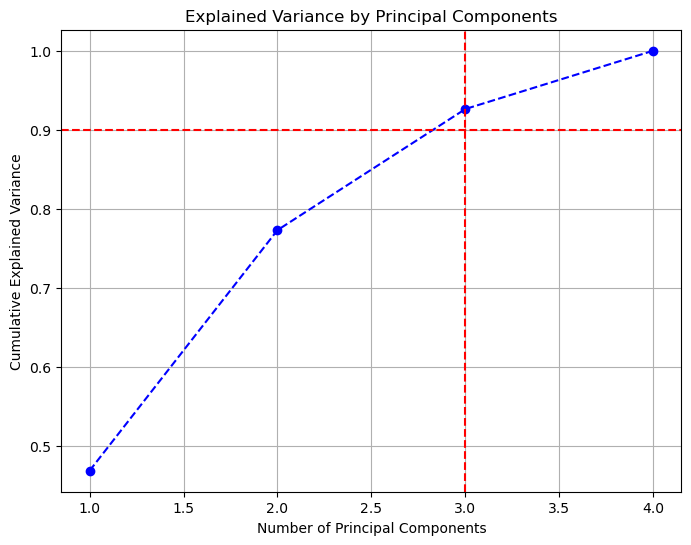

In [256]:
# Visualize explained variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.axhline(y=0.90, color='r', linestyle='--')
plt.axvline(x=n_components_90, color='r', linestyle='--')
plt.grid(True)
plt.show()

In [257]:
#  Interpretation - Explained variance for each component
for i, var in enumerate(explained_variance):
    print(f"Principal Component {i+1}: {var*100:.2f}% of the variance")

Principal Component 1: 46.83% of the variance
Principal Component 2: 30.46% of the variance
Principal Component 3: 15.33% of the variance
Principal Component 4: 7.38% of the variance


## Results 
>The PCA results indicate that the first two principal components capture the majority of the variance in the dataset, making them the most crucial for understanding the key patterns in productivity. The third component adds additional detail, while the fourth component contributes less. By focusing on these principal components, you can gain insights into the primary drivers of productivity and make data-informed decisions to optimize productivity in the organization.The PCA results indicate that the first two principal components capture the majority of the variance in the dataset, making them the most crucial for understanding the key patterns in productivity. The third component adds additional detail, while the fourth component contributes less. By focusing on these principal components, you can gain insights into the primary drivers of productivity and make data-informed decisions to optimize productivity in the organization.

***
# Clustering Analysis

In [260]:
# Select the features for clustering
features = ['Actual Productivity', 'Overtime', 'No. of Workers']
X = funnel[features]

In [261]:
# standardize  the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [262]:
# Determine the optimal number of clusters using the Elbow method
inertia = []
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

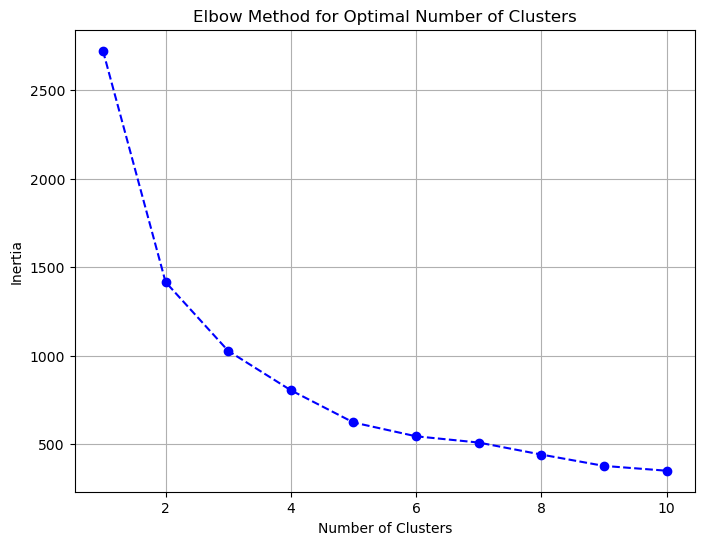

In [263]:
# Plot the Elbow method
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.grid(True)
plt.show()

In [264]:
optimal_clusters = 4

In [265]:
# Perform K-Means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=0)
funnel['Cluster'] = kmeans.fit_predict(X_scaled)

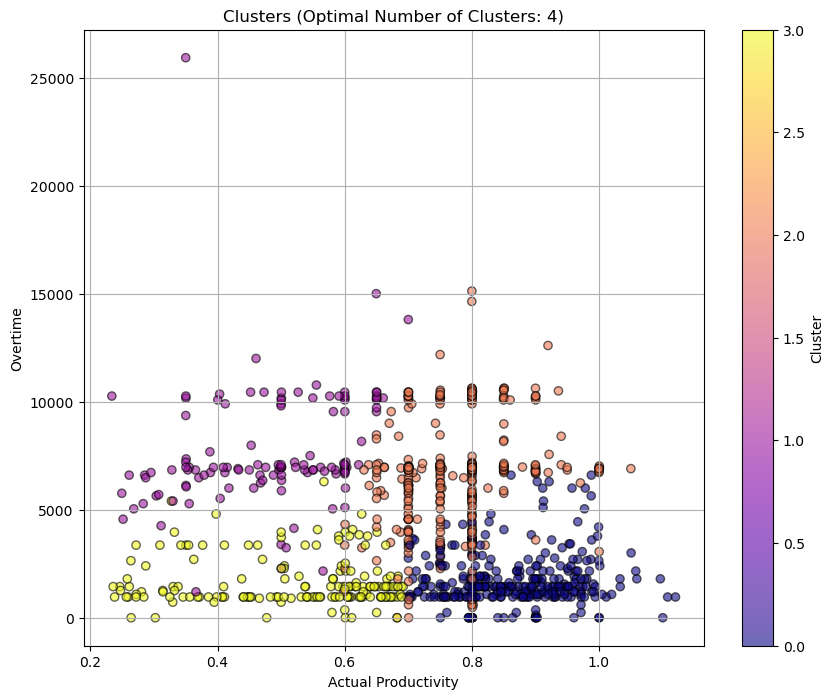

In [266]:
# Visualize the clusters
plt.figure(figsize=(10, 8))
# Scatter plot of clusters
scatter = plt.scatter(funnel['Actual Productivity'], funnel['Overtime'],
                      c=funnel['Cluster'], cmap='plasma', alpha=0.6, edgecolor='k')

plt.colorbar(scatter, label='Cluster')
plt.xlabel('Actual Productivity')
plt.ylabel('Overtime')
plt.title(f'Clusters (Optimal Number of Clusters: {optimal_clusters})')
plt.grid(True)
plt.show()

In [267]:
##Cluster 0 (Indigo):
#Characteristics: Employees with higher actual productivity and low overtime.
#Insights: This cluster likely represents the most efficient employees, achieving high productivity with minimal overtime.

#Cluster 1 (Purple):
#Characteristics: Employees with moderate productivity but higher overtime.
#Insights: This group consists of employees who put in more overtime but only achieve moderate productivity, 
#          indicating a potential need for process improvements.

#Cluster 2 (Orange):
#Characteristics: Employees with high productivity and high overtime.
#Insights: These employees perform well but require more overtime to do so, signaling potential burnout risks or the need 
#          to redistribute workloads.

#Cluster 3 (Yellow):
#Characteristics: Employees with varying productivity and low overtime.
#Insights: This group reflects employees who maintain varying productivity levels without much overtime, indicating effective work practices.

#Summary

#Efficiency and Productivity: Clusters 0 and 3 showcase more efficient use of overtime, 
#                             suggesting balanced workloads and effective work habits.

#Areas for Improvement: Cluster 1 highlights a need for improvements or support, as employees are
#                       working more overtime without a corresponding increase in productivity.

#Burnout Risk: Cluster 2 reveals potential burnout concerns due to increased overtime, despite high productivity. 
#              These employees may benefit from workload adjustments or additional resources.

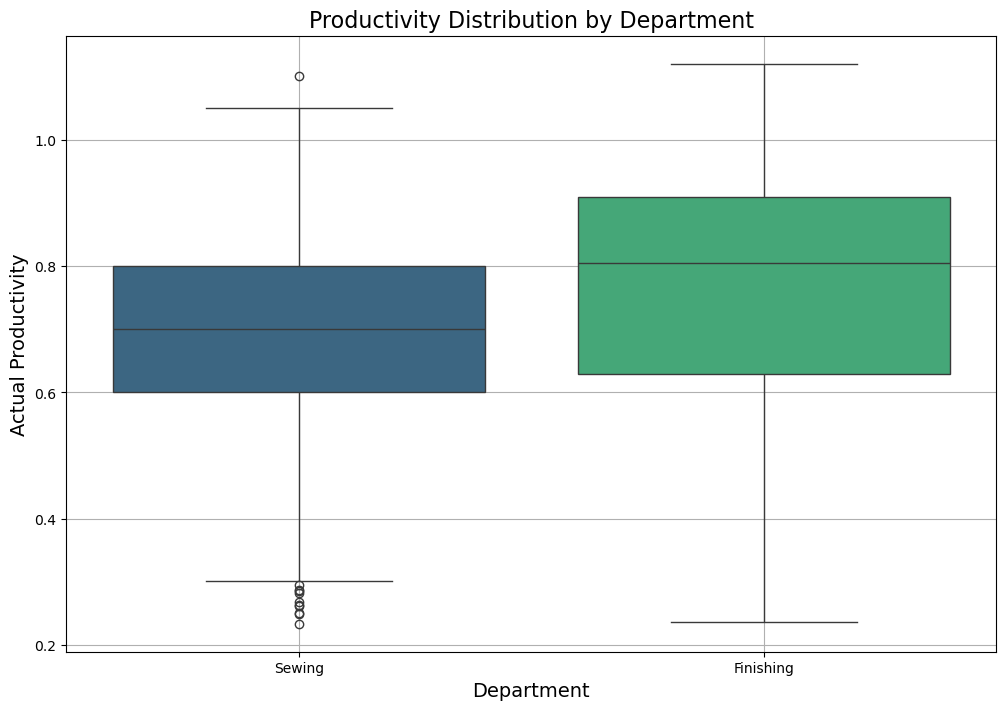

In [268]:
# Set the figure size
plt.figure(figsize=(12, 8))

# Assign 'Department' to both 'x' and 'hue' for consistent color usage and avoid the warning
sns.boxplot(x='Department', y='Actual Productivity', data=funnel, hue='Department', palette='viridis', dodge=False, legend=False)

# Set labels and title
plt.xlabel('Department', fontsize=14)
plt.ylabel('Actual Productivity', fontsize=14)
plt.title('Productivity Distribution by Department', fontsize=16)

# Show the plot
plt.grid(True)
plt.show()

In [269]:
# The Fishing Department demonstrates a higher level of productivity in comparison to the Sewing Department.

***


# Forcasting using ARIMA 


In [271]:
funnel["Targeted Productivity"].unique()

array([0.8 , 0.75, 0.7 , 0.65, 0.6 , 0.35, 0.5 , 0.07, 0.4 ])

In [272]:
productivity_frequency = funnel['Targeted Productivity'].value_counts()
productivity_frequency

Targeted Productivity
0.80    368
0.70    198
0.75    158
0.65     61
0.60     54
0.50     42
0.35     25
0.07      1
0.40      1
Name: count, dtype: int64

In [273]:
funnel.shape

(908, 8)

In [274]:
# Convert 'Date' to datetime
funnel['Date'] = pd.to_datetime(funnel['Date'])

In [275]:
# First, ensure that 'Actual Productivity' is a numeric type
funnel['Actual Productivity'] = pd.to_numeric(funnel['Actual Productivity'], errors='coerce')

# Resample the data to get weekly mean of 'Actual Productivity'
weekly_data = funnel.resample('W', on='Date')['Actual Productivity'].mean()  # Specify the column for mean calculation

# Convert the Series to a DataFrame and reset the index
weekly_data = weekly_data.reset_index()  # This converts the Series to a DataFrame and keeps the date as a column
weekly_data = weekly_data.rename(columns={1: 'Actual Productivity'})  # Rename the column to 'Actual Productivity'

In [276]:
weekly_data.head()

,Date,Actual Productivity
0,2015-01-04,0.715386
1,2015-01-11,NaN
2,2015-01-18,0.684742
3,2015-01-25,0.717492
4,2015-02-01,0.760212


In [277]:
# Convert 'Date' to datetime
weekly_data['Date'] = pd.to_datetime(weekly_data['Date'])

In [278]:
weekly_data.set_index('Date', inplace=False)

,Actual Productivity
Date,
2015-01-04,0.715386
2015-01-11,NaN
2015-01-18,0.684742
2015-01-25,0.717492
2015-02-01,0.760212
2015-02-08,0.701322
2015-02-15,0.676995
2015-02-22,0.667398
2015-03-01,0.690482


In [279]:
# Select the 'Actual Productivity' column
productivity_data = weekly_data['Actual Productivity']

In [280]:
train_data = productivity_data[:-4]
test_data = productivity_data[-4:]

In [281]:
# Build the ARIMA model
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train_data, order=(1, 1, 1))  # (p, d, q) parameters

# Fit the model
model_fit = model.fit()

In [282]:
# Forecast the next 4 weeks
forecast = model_fit.forecast(steps=4)

In [283]:
forecast

45    0.748212
46    0.742461
47    0.740230
48    0.739364
Name: predicted_mean, dtype: float64

In [284]:
test_data = test_data.dropna()
forecast = pd.Series(forecast).dropna()

In [335]:
test_data = test_data[:len(forecast)]

In [339]:
print(len(test_data))
print(len(forecast))

1
4


In [341]:
# If test_data and forecast are numpy arrays
import numpy as np

test_data = np.array(test_data).flatten()
forecast = np.array(forecast).flatten()

In [343]:
min_length = min(len(test_data), len(forecast))
test_data = test_data[:min_length]
forecast = forecast[:min_length]

In [345]:
# Calculate Mean Squared Error (MSE)
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
mse = mean_squared_error(test_data, forecast)

# Calculate Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(test_data, forecast)

# Print the results
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}')

Mean Squared Error (MSE): 0.0035763895856033984
Mean Absolute Percentage Error (MAPE): 8.68711840490372


In [347]:
test_data

array([0.68840921])

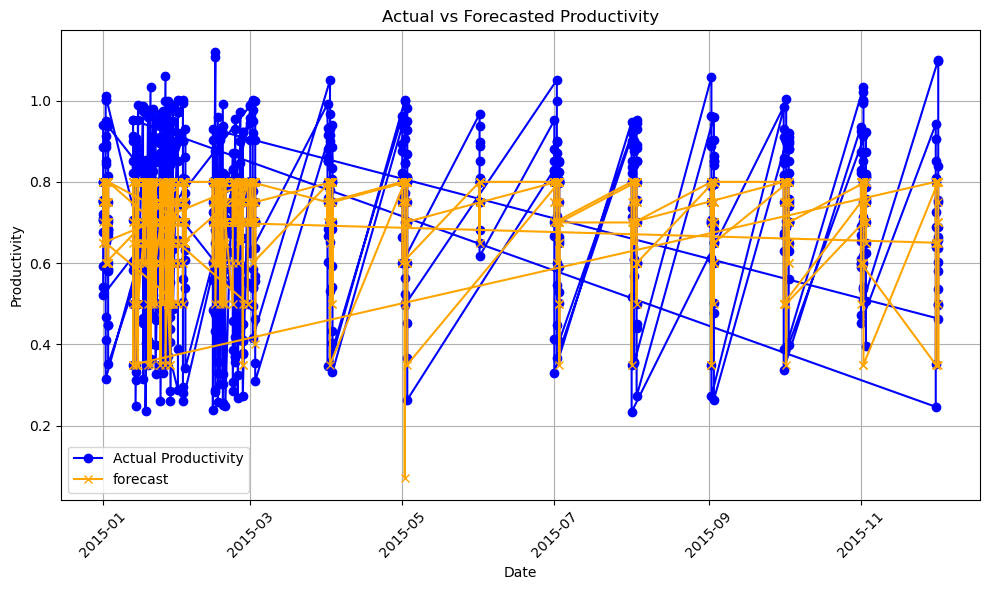

In [353]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(funnel['Date'], funnel['Actual Productivity'], label='Actual Productivity', color='blue', marker='o')
plt.plot(funnel['Date'], funnel['Targeted Productivity'], label='forecast', color='orange', marker='x')

plt.title('Actual vs Forecasted Productivity')
plt.xlabel('Date')
plt.ylabel('Productivity')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()